In [44]:
import numpy as np
from six.moves import cPickle as pickle
from scipy import misc
import scipy.io as sio
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
import math
import random
import os
from planar import BoundingBox, Affine
%matplotlib inline
print "Done"

Done


In [45]:
folder1="train"
raw_training_data = sio.loadmat(folder1 + "_data")[folder1 + '_dataset']

folder2="extra"
raw_extra_data = sio.loadmat(folder2 + "_data")[folder2 + '_dataset']
print "Done"

Done


In [46]:
train_image_names, train_labels, train_bboxes, train_n_bboxes = raw_training_data['names'], raw_training_data['labels'], raw_training_data['bbox'], raw_training_data['length']
print train_image_names.shape
print train_labels.shape
print train_bboxes.shape
print train_n_bboxes.shape
TRAIN_DATASET_SIZE=train_labels.shape[1]

extra_image_names, extra_labels, extra_bboxes, extra_n_bboxes = raw_extra_data['names'], raw_extra_data['labels'], raw_extra_data['bbox'], raw_extra_data['length']
print extra_image_names.shape
print extra_labels.shape
print extra_bboxes.shape
print extra_n_bboxes.shape

(1, 33402)
(1, 33402)
(1, 33402)
(1, 33402)
(1, 202353)
(1, 202353)
(1, 202353)
(1, 202353)


In [47]:
train_image_names = train_image_names.reshape(train_image_names.shape[1])
train_labels = train_labels.reshape(train_labels.shape[1])
train_bboxes = train_bboxes.reshape(train_bboxes.shape[1])
train_n_bboxes = train_n_bboxes.reshape(train_n_bboxes.shape[1])

train_image_names = [item for sublist in train_image_names for item in sublist]
train_labels = [item for sublist in train_labels for item in sublist]
train_bboxes = [item for sublist in train_bboxes for item in sublist]
train_n_bboxes = [item for sublist in train_n_bboxes for item in sublist]

print "Done"

Done


In [48]:
extra_image_names = extra_image_names.reshape(extra_image_names.shape[1])
extra_labels = extra_labels.reshape(extra_labels.shape[1])
extra_bboxes = extra_bboxes.reshape(extra_bboxes.shape[1])
extra_n_bboxes = extra_n_bboxes.reshape(extra_n_bboxes.shape[1])

extra_image_names = [item for sublist in extra_image_names for item in sublist]
extra_labels = [item for sublist in extra_labels for item in sublist]
extra_bboxes = [item for sublist in extra_bboxes for item in sublist]
extra_n_bboxes = [item for sublist in extra_n_bboxes for item in sublist]

print "Done"

Done


In [49]:
train_image_names = np.append(train_image_names, extra_image_names)
train_labels = np.append(train_labels, extra_labels)
train_bboxes = np.append(train_bboxes, extra_bboxes, axis=0)
train_n_bboxes = np.append(train_n_bboxes, extra_n_bboxes)

In [50]:
print train_image_names.shape
print train_labels.shape
print train_bboxes.shape
print train_n_bboxes.shape

(235755,)
(235755,)
(235755, 4)
(235755,)


Original Shape: (79, 161)
Shape (Before): (34, 28)
Height: 34
Width: 28
Height: 34.0
Width: 28.0
13 47 57 85
Height: 34.0
Width: 28.0
13 47 57 85
(34, 28)


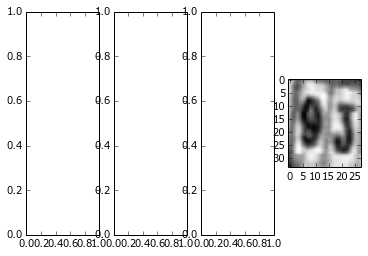

In [12]:
f, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4)
id = 3
# display the first and the last image and labels for the training dataset
img = misc.imread("./" + folder1 + "/" + str(train_image_names[id]), flatten=True)
print "Original Shape:", img.shape

aa, bb, cc, dd =  map(int, train_bboxes[id])
img1 = img[aa:bb, cc:dd]
print "Shape (Before):", img1.shape

print "Height:", bb - aa
print "Width:", dd - cc

bbox = BoundingBox([(cc,aa), (dd,bb)])
print "Height:", bbox.height
print "Width:", bbox.width
cc, aa = map(int,list(bbox.min_point))
dd, bb = map(int,list(bbox.max_point))
print aa, bb, cc, dd

print "Height:", bbox.height
print "Width:", bbox.width

cc, aa = map(int,list(bbox.min_point))
dd, bb = map(int,list(bbox.max_point))
print aa, bb, cc, dd
i = img[aa:bb, cc:dd]
print i.shape
ax3.imshow(i, cmap=plt.cm.Greys)



# backup

# if the image is less than the desired size, expand it
if bbox.height < IMAGE_SIZE and bbox.width > IMAGE_SIZE:
    # calculates the maximum value that the bbox can expand to 
    max_height = min(aa, (IMAGE_SIZE-bb)) 
    bbox = bbox.inflate((0,max_height))
    
# if the image is less than the desired size, expand it
if bbox.width < IMAGE_SIZE and bbox.height > IMAGE_SIZE:
    # calculates the maximum value that the bbox can expand to 
    max_width = min(cc, (IMAGE_SIZE-dd)) 
    bbox = bbox.inflate((max_width,0))
    
if bbox.width < IMAGE_SIZE and bbox.height < IMAGE_SIZE:
    # if the image is less than the desired size, expand it
    if bbox.height < bbox.width:
        # calculates the maximum value that the bbox can expand to 
        max_height = min(aa, (img_h-bb)) 
        bbox = bbox.inflate((0,max_height))
    elif bbox.height > bbox.width:
        max_width = min(cc, (img_w-dd)) 
        bbox = bbox.inflate((max_width,0))
    else:
        max_height = min(aa, (img_h-bb)) 
        max_width = min(cc, (img_w-dd)) 
        value = min(max_height, max_width)
        bbox = bbox.inflate(value)

Original Shape: (350, 741)
Shape (Before): (223, 173)
Width: 173.0 Height: 223.0
77 300 221 444
Shape (After square): (223, 223)
77 300 221 444
Shape (After expading): (223, 223)
Final: (64, 64)
[1, 9]
Final: (64, 64)
After random crop: (1, 56, 56, 1)


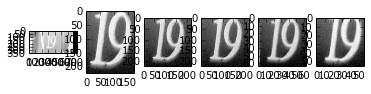

In [43]:
import tensorflow as tf

f, (ax0, ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 6)

id = 0
# display the first and the last image and labels for the training dataset
img = misc.imread("./" + folder1 + "/" + str(train_image_names[id]), flatten=True)
# get the new image size
img_h = img.shape[0]
img_w = img.shape[1]
    
print "Original Shape:", img.shape
ax0.imshow(img, cmap=plt.cm.Greys)
aa, bb, cc, dd =  map(int, train_bboxes[id])
img1 = img[aa:bb, cc:dd]
print "Shape (Before):", img1.shape
ax1.imshow(img1, cmap=plt.cm.Greys)

bbox = BoundingBox([(cc,aa), (dd,bb)])

print "Width:", bbox.width, "Height:", bbox.height

if bbox.width > bbox.height:
    needed_value =  bbox.width - bbox.height
    max_height = min(aa, (img_h-bb)) 
    if (needed_value) <= max_height:
        print "AQUIIII"
        bbox = bbox.inflate((0, needed_value))
    else:
        print "AQUIIII"
        bbox = bbox.inflate((0,max_height)) 
elif bbox.width < bbox.height:
    max_width = min(cc, (img_w-dd)) 
    needed_value =  bbox.height - bbox.width
    if (needed_value) <= max_width:
        bbox = bbox.inflate((needed_value,0))
    else:
        bbox = bbox.inflate((max_width,0)) 
    
cc, aa = map(int,list(bbox.min_point))
dd, bb = map(int,list(bbox.max_point))
print aa, bb, cc, dd
img2 = img[aa:bb, cc:dd]
print "Shape (After square):", img2.shape
ax2.imshow(img2, cmap=plt.cm.Greys)
 

if bbox.is_empty == True:
    print "Deu pau!!!"
        
cc, aa = map(int,list(bbox.min_point))
dd, bb = map(int,list(bbox.max_point))
print aa, bb, cc, dd
img3 = img[aa:bb, cc:dd]
print "Shape (After expading):", img3.shape
ax3.imshow(img3, cmap=plt.cm.Greys)
    
img4 = misc.imresize(img3,(IMAGE_SIZE, IMAGE_SIZE))
print "Final:", img4.shape
ax4.imshow(img4, cmap=plt.cm.Greys)

print list(train_labels[id])

reshaped_image = np.reshape(img4, (1,64,64,1))
print "Final:", img4.shape

# Randomly crop a [height, width] section of the image.
distorted_image = tf.random_crop(reshaped_image, [1, 56, 56, 1])
# distorted_image = tf.image.random_flip_left_right(distorted_image)

sess = tf.Session()
res = distorted_image.eval(session=sess)

print "After random crop:", res.shape
ax5.imshow(res.reshape(56,56), cmap=plt.cm.Greys)

Original Shape: (141, 166)
5 50 38 87
BoundingBox([(23, 24), (126, 126)])
[4, 7, 8]
[3, 3]


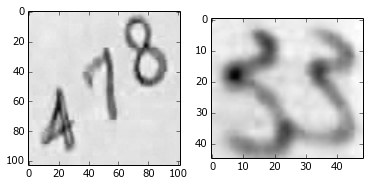

In [96]:
# display first and last image of the extra dataset
f, (ax1, ax2) = plt.subplots(1, 2)

id = 33402
# display the first and the last image and labels for the training dataset
img = misc.imread("./" + folder2 + "/" + str(train_image_names[id]), flatten=True)
print "Original Shape:", img.shape

print aa, bb, cc, dd
aa, bb, cc, dd = map(int, train_bboxes[id])
bbox = BoundingBox([(bb,dd), (aa,cc)])

print bbox

img = img[aa:bb, cc:dd]
ax1.imshow(img, cmap=plt.cm.Greys)
print list(train_labels[id])

id = 113401
img = misc.imread("./" + folder2 + "/" + str(train_image_names[id]), flatten=True)
aa, bb, cc, dd = map(int, train_bboxes[id])
img = img[aa:bb, cc:dd]
ax2.imshow(img, cmap=plt.cm.Greys)
print list(train_labels[id])

In [10]:
print TRAIN_DATASET_SIZE

33402


In [15]:
IMAGE_SIZE=64
N_CHANNELS=1
DATASET_SIZE = 235000
MAX_NUMBER_OF_LABELS=5
PIXEL_DEPTH=255.0
VALIDATION_DATASET_SIZE=500
TEST_DATASET_SIZE=500

In [303]:
def display_images_at_random(dataset, labels):
    # random.seed(1)
    
    f, axarr = plt.subplots(4, 3, figsize=(11,15))
    
    for i in range(4):
        for j in range(3):
            img_rand_index = random.randrange(0,dataset.shape[0])
            axarr[i, j].imshow(dataset[img_rand_index].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap=plt.cm.Greys);
            axarr[i, j].set_title('Label: ' + str(labels[img_rand_index]) + "Id: " + str(img_rand_index))

    plt.show()

In [ ]:
dataset_id = 0
dataset = np.zeros(shape=(DATASET_SIZE, IMAGE_SIZE, IMAGE_SIZE, N_CHANNELS), dtype=np.float32)
labels = np.zeros(shape=(DATASET_SIZE, MAX_NUMBER_OF_LABELS), dtype=np.int8)
n_bboxes = []
selected_images = []
skipped_images_count = 0

for img_id in range(0,len(train_labels)):

    discard = False
    is_resized = False

    if (img_id < TRAIN_DATASET_SIZE):
        current_folder = folder1 # get from the extra dataset
        print "Using:", folder1
    else:
        current_folder = folder2
        print "Using:", folder2

    # get the image file name
    img_name = train_image_names[img_id]
    img_labels = list(train_labels[img_id])
    img_bboxes_number = train_n_bboxes[img_id]

    # if the image has more than [MAX_NUMBER_OF_LABELS] digits, discard it
    if len(img_labels) > MAX_NUMBER_OF_LABELS:
        print "Discarding image:", img_name, "\tMore than:", MAX_NUMBER_OF_LABELS, "digits."
        skipped_images_count += 1
        continue
    
    # read the image from disk
    try:
        original_img = misc.imread("./" + current_folder + "/" + img_name, flatten=True)

    except IOError as e:
        print("Oops! Problem reading that image, lets skip it.")
        skipped_images_count += 1
        continue
        
    print "Processing image:", img_name, "\tOriginal shape:", original_img.shape

    # get the new image size
    img_h = original_img.shape[0]
    img_w = original_img.shape[1]
    
    # read the bbox data
    aa, bb, cc, dd = map(int, train_bboxes[img_id])
    
    # create bbox
    bbox = BoundingBox([(cc,aa), (dd,bb)])
    
    # make the bboxes sqaured
    if bbox.width > bbox.height:
        needed_value =  bbox.width - bbox.height
        max_height = min(aa, (img_h-bb)) 
        if (needed_value) <= max_height:
            print "AQUIIII"
            bbox = bbox.inflate((0, needed_value))
        else:
            print "AQUIIII"
            bbox = bbox.inflate((0,max_height)) 
    elif bbox.width < bbox.height:
        max_width = min(cc, (img_w-dd)) 
        needed_value =  bbox.height - bbox.width
        if (needed_value) <= max_width:
            bbox = bbox.inflate((needed_value,0))
        else:
            bbox = bbox.inflate((max_width,0)) 
    
    cc, aa = map(int,list(bbox.min_point))
    dd, bb = map(int,list(bbox.max_point))
    
    # crop the images to the bboxes
    img = original_img[aa:bb, cc:dd]   
    print img.shape    
    
    print img.shape
    img = misc.imresize(img,(IMAGE_SIZE, IMAGE_SIZE))
    
    # TODO: normalize the image
    img = (img - (PIXEL_DEPTH / 2.0)) / PIXEL_DEPTH
    dataset[dataset_id] = img.reshape(IMAGE_SIZE,IMAGE_SIZE,N_CHANNELS)

    # append -1 for images with less than MAX_NUMBER_OF_LABELS digits on it
    while len(img_labels) < MAX_NUMBER_OF_LABELS:
        img_labels = np.append(img_labels, -1)

    labels[dataset_id] = img_labels
    selected_images.append(img_name)
    n_bboxes.append(img_bboxes_number);

    if dataset_id==DATASET_SIZE:
        break
    
    dataset_id += 1

print "Done"

Using: train
Processing image: 1.png 	Original shape: (350, 741)
(223, 223)
(223, 223)
Using: train
Processing image: 2.png 	Original shape: (83, 199)
AQUIIII
(47, 47)
(47, 47)
Using: train
Processing image: 3.png 	Original shape: (23, 52)
AQUIIII
(17, 17)
(17, 17)
Using: train
Processing image: 4.png 	Original shape: (79, 161)
(34, 34)
(34, 34)
Using: train
Processing image: 5.png 	Original shape: (68, 140)
(49, 49)
(49, 49)
Using: train
Processing image: 6.png 	Original shape: (35, 74)
(23, 23)
(23, 23)
Using: train
Processing image: 7.png 	Original shape: (54, 99)
(33, 33)
(33, 33)
Using: train
Processing image: 8.png 	Original shape: (22, 54)
AQUIIII
(19, 21)
(19, 21)
Using: train
Processing image: 9.png 	Original shape: (34, 79)
AQUIIII
(29, 36)
(29, 36)
Using: train
Processing image: 10.png 	Original shape: (37, 74)
(29, 29)
(29, 29)
Using: train
Processing image: 11.png 	Original shape: (33, 63)
(27, 27)
(27, 27)
Using: train
Processing image: 12.png 	Original shape: (87, 171)
(

In [ ]:
_, (ax1, ax2) = plt.subplots(1, 2)

id = 100
img = dataset[id,:,:]
ax1.imshow(img.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap=plt.cm.Greys);
print labels[id]

id = 33402
img = dataset[id,:,:]
ax2.imshow(img.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap=plt.cm.Greys);
print labels[id]

In [14]:
print "New shape", dataset.shape
print "New Labels:", labels.shape
print skipped_images_count

New shape (235000, 56, 56, 1)
New Labels: (235000, 5)
62


# of digits: 2
Labels: [ 2  3 -1 -1 -1]


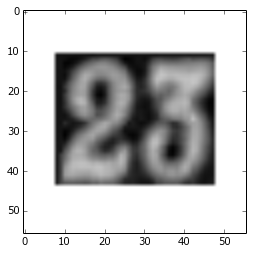

In [20]:
id = 234999
img = dataset[id]
# print img
plt.imshow(img.reshape(img.shape[0], img.shape[1]), cmap=plt.cm.Greys)
print "# of digits:", n_bboxes[id]
print "Labels:", labels[id]

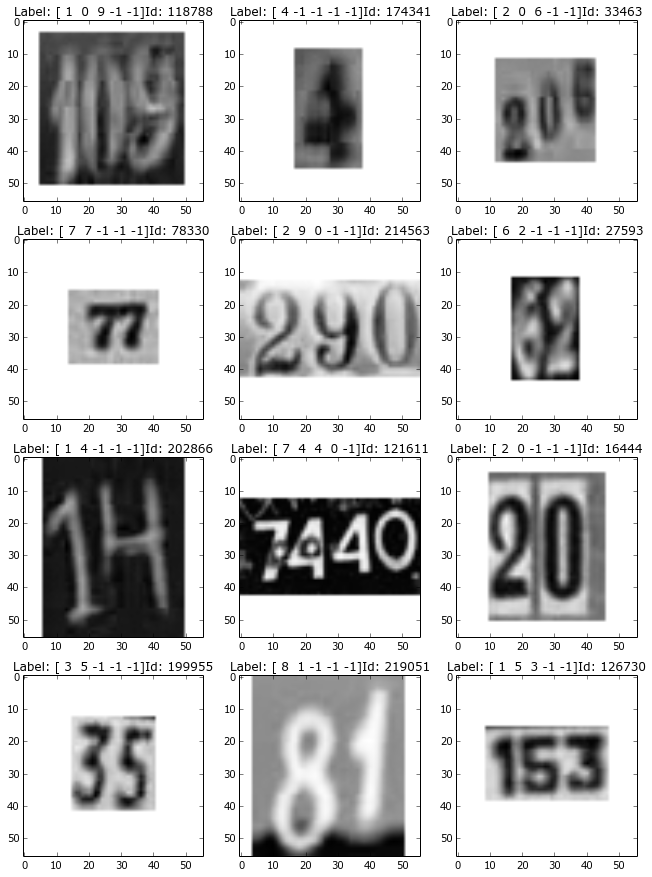

In [19]:
display_images_at_random(dataset, labels)

In [ ]:
# valid_dataset = dataset[:VALIDATION_DATASET_SIZE]
# valid_labels = labels[:VALIDATION_DATASET_SIZE]

# test_dataset = dataset[VALIDATION_DATASET_SIZE:TEST_DATASET_SIZE]
# test_labels = labels[VALIDATION_DATASET_SIZE:TEST_DATASET_SIZE]

# train_dataset = dataset[TEST_DATASET_SIZE:]
# train_labels = labels[TEST_DATASET_SIZE:]

In [ ]:
# print('Training set', train_dataset.shape, train_labels.shape)
# print('Validation set', valid_dataset.shape, valid_labels.shape)
# print('Test set', test_dataset.shape, test_labels.shape)

In [ ]:

pickle_file = 'dataset.pickle'

try:
  f = open(pickle_file, 'wb')
  save = {
     'train_dataset': dataset,
     'train_labels': labels,
     'train_dataset_n_bboxes': n_bboxes,
#     'valid_labels': valid_labels,
#    'test_dataset': dataset,
#    'test_labels': labels,
    }
  pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print 'Unable to save data to', pickle_file, ':', e
  raise
print "Done"

In [ ]:
statinfo = os.stat(pickle_file)
print 'Compressed pickle size:', statinfo.st_size